In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Data

In [150]:
df = pd.read_csv('Income Evaluation Data Here')

In [151]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [152]:
df.shape

(32561, 15)

In [153]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [154]:
col_names = ["age", "workclass", "finalweight", "education", "education_num",
             "martial_status", "occupation","relationship", "race", "sex",
             "capital_gain", "capital-loss", "hours_per_week",
             "native_country", "income"]

In [155]:
df.columns = col_names

In [156]:
df.columns

Index(['age', 'workclass', 'finalweight', 'education', 'education_num',
       'martial_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital-loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   finalweight     32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   martial_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [158]:
df.describe()

,age,finalweight,education_num,capital_gain,capital-loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [159]:
categorical = [col for col in df.columns if df[col].dtype == "O"]
numerical = [col for col in df.columns if df[col].dtype != "O"]

In [160]:
categorical

['workclass',
 'education',
 'martial_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [161]:
numerical

['age',
 'finalweight',
 'education_num',
 'capital_gain',
 'capital-loss',
 'hours_per_week']

In [162]:
df[categorical].head()

,workclass,education,martial_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [163]:
df[numerical].head()

,age,finalweight,education_num,capital_gain,capital-loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


#EDA

In [164]:
for col in categorical:
  print(df[col].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
martial_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

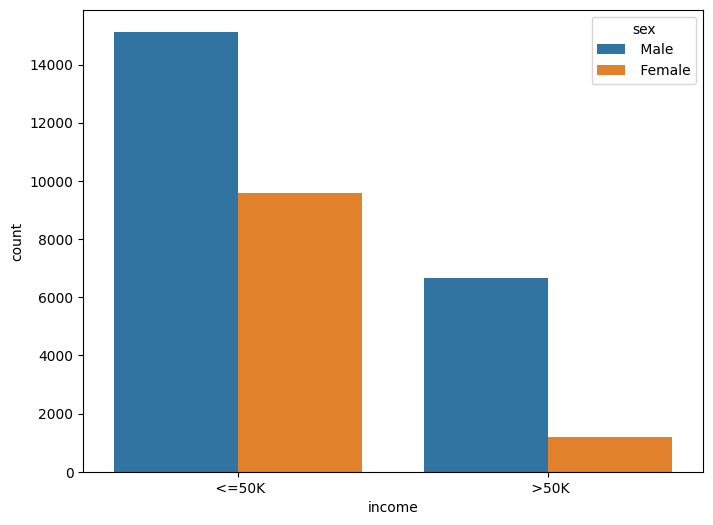

In [165]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x = "income", hue = "sex", data = df)
ax_title = ("Distribution of Income with Gender")
plt.show()

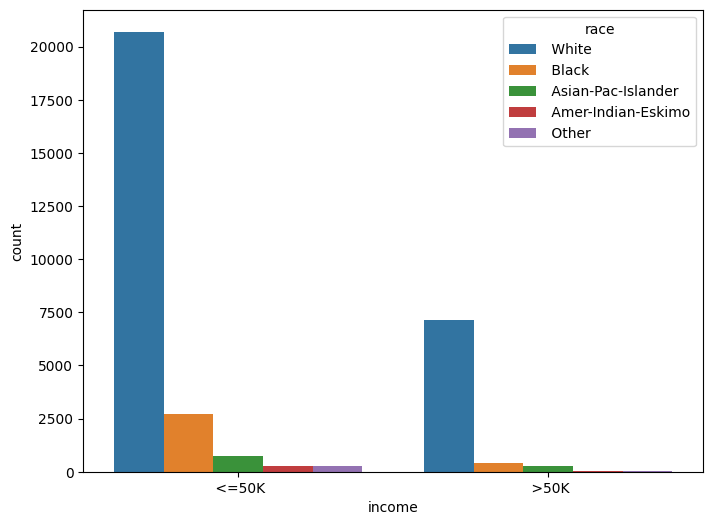

In [166]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.countplot(x = "income", hue = "race", data = df)
ax_title = ("Distribution of Income with Gender")
plt.show()

In [167]:
df.head()

,age,workclass,finalweight,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital-loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


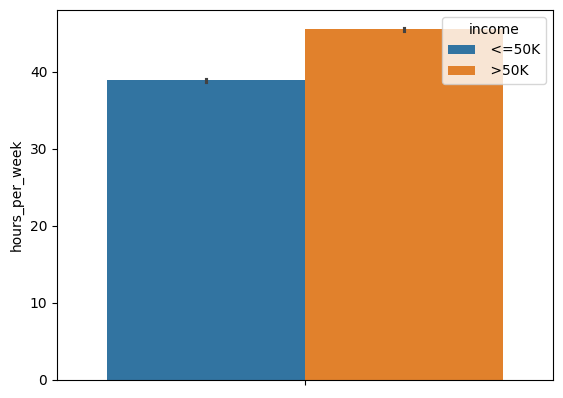

In [168]:
sns.barplot(y = df["hours_per_week"], hue = df["income"])
plt.show()

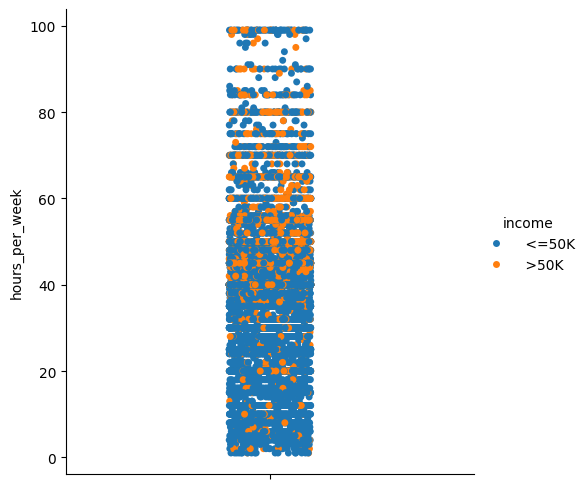

In [169]:
sns.catplot(y = df["hours_per_week"], hue = df["income"])
plt.show()

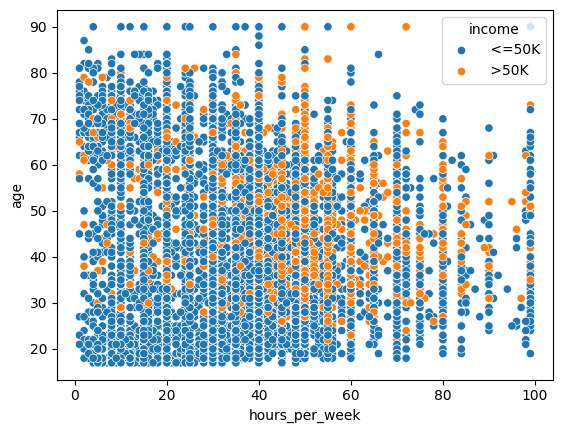

In [170]:
sns.scatterplot(x = df["hours_per_week"], y = df["age"], hue = df["income"])
plt.show()

In [171]:
over_40_hours = df[df["hours_per_week"] > 40]
under_40_hours = df[df["hours_per_week"] <= 40]

In [172]:
over_40_hours["income"].value_counts()

,count
income,
<=50K,5725
>50K,3856


In [173]:
under_40_hours["income"].value_counts()

,count
income,
<=50K,18995
>50K,3985


#Data Preperation for Modeling

In [174]:
categorical

['workclass',
 'education',
 'martial_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [175]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [176]:
df["workclass"].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [177]:
df["workclass"] = df["workclass"].replace(" ?", np.nan)

In [178]:
df["workclass"].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [179]:
categorical

['workclass',
 'education',
 'martial_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [180]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [181]:
df["martial_status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [182]:
df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [183]:
df["occupation"] = df["occupation"].replace(" ?", np.nan)

In [184]:
df["relationship"].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [185]:
df["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [186]:
df["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [187]:
df["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [188]:
df["native_country"] = df["native_country"].replace(" ?", np.nan)

In [189]:
df.isnull().sum()

,0
age,0
workclass,1836
finalweight,0
education,0
education_num,0
martial_status,0
occupation,1843
relationship,0
race,0
sex,0


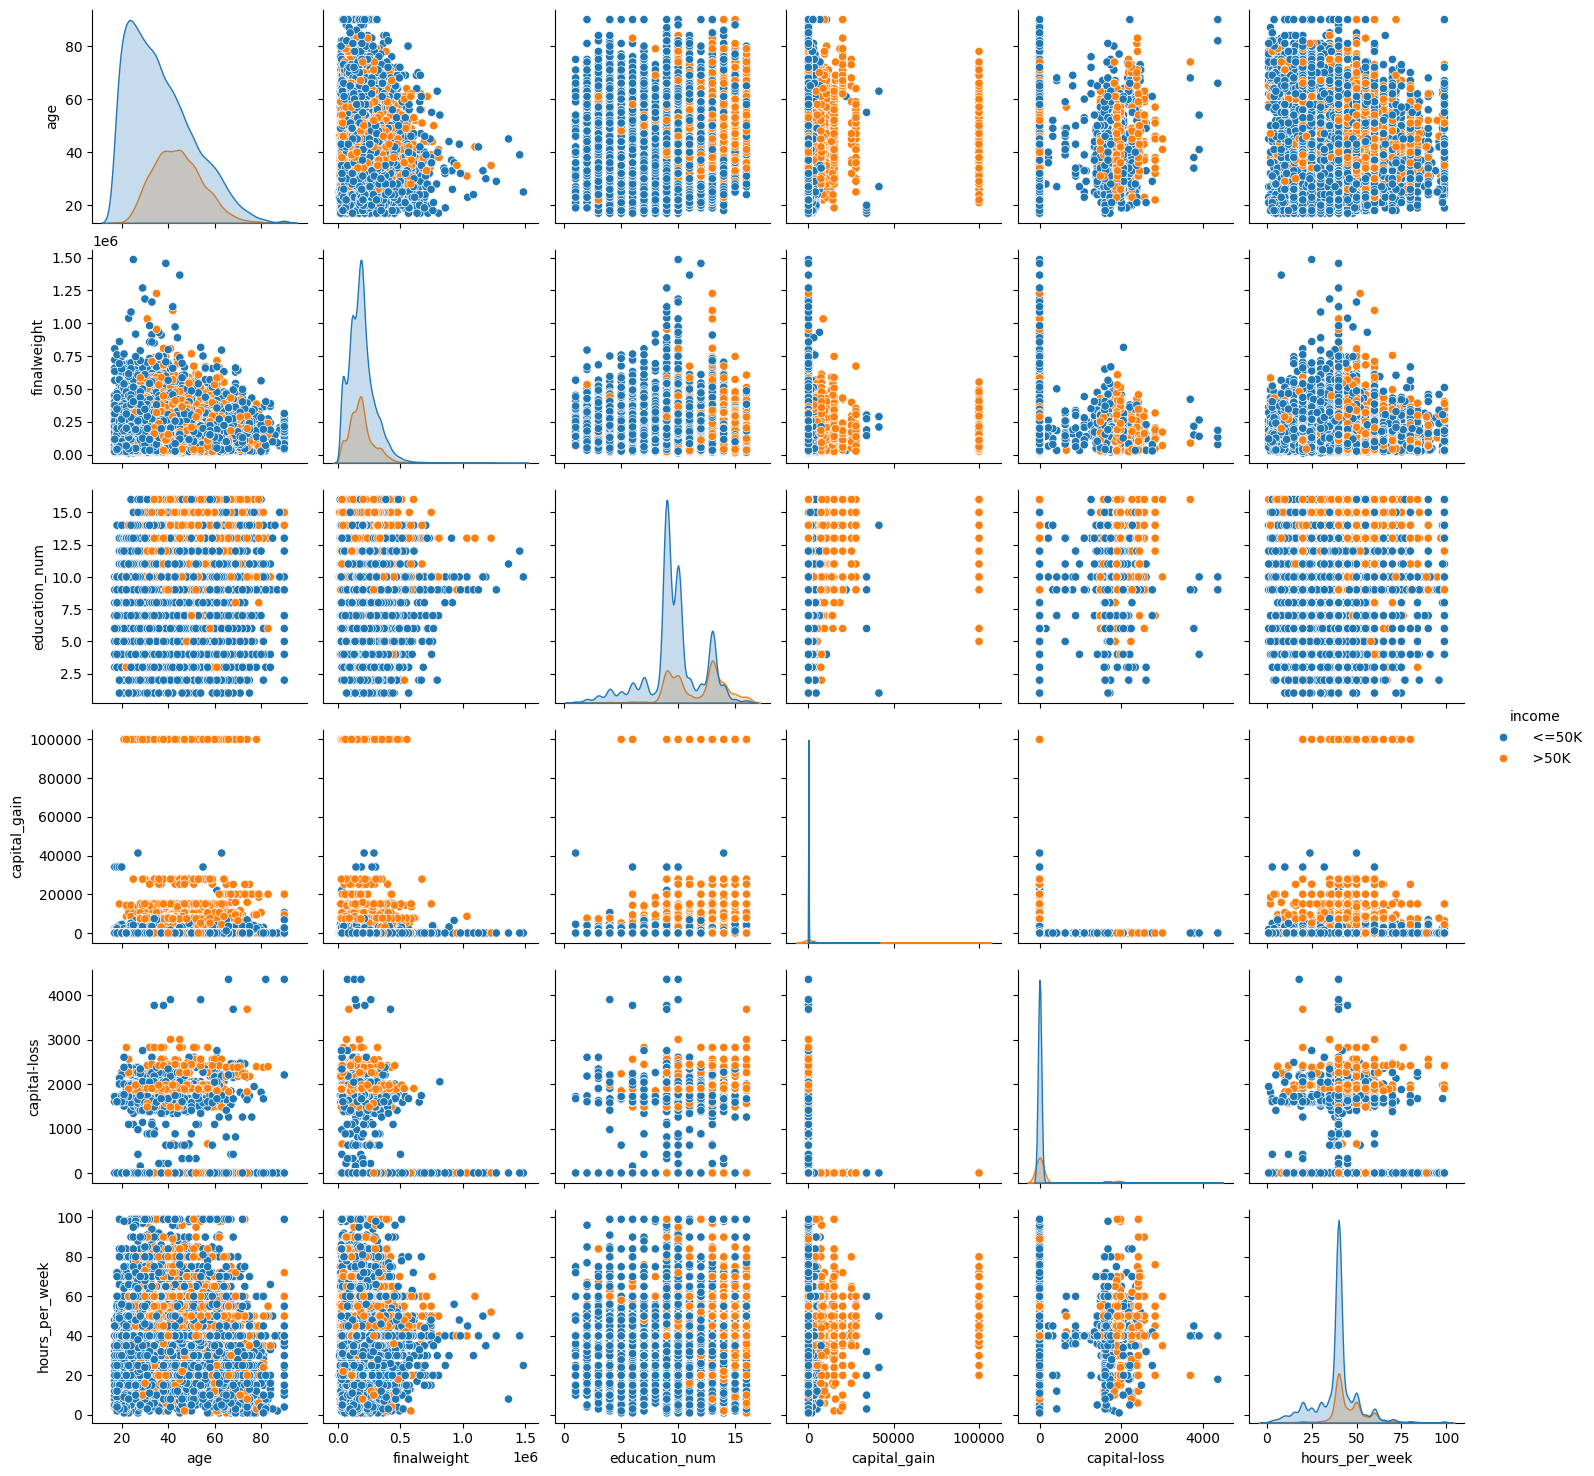

In [190]:
sns.pairplot(df , hue= "income")
plt.show()

##Train-Test Split

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X = df.drop("income", axis = 1)
y = df["income"]

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

###Null Data

In [194]:
categorical = [col for col in X_train.columns if X_train[col].dtype == "O"]

In [195]:
X_train[categorical].isnull().sum()

,0
workclass,1276
education,0
martial_status,0
occupation,1278
relationship,0
race,0
sex,0
native_country,414


In [196]:
X_test[categorical].isnull().sum()

,0
workclass,560
education,0
martial_status,0
occupation,565
relationship,0
race,0
sex,0
native_country,169


In [197]:
X_train["workclass"].mode()

,workclass
0,Private


In [198]:
X_train["occupation"].mode()

,occupation
0,Craft-repair


In [199]:
X_train["native_country"].mode()

,native_country
0,United-States


In [200]:
for i in [X_train, X_test]:
  i["workclass"] = i["workclass"].fillna(X_train["workclass"].mode()[0])
  i["occupation"] = i["occupation"].fillna(X_train["occupation"].mode()[0])
  i["native_country"] = i["native_country"].fillna(X_train["native_country"].mode()[0])

In [201]:
X_train[categorical].isnull().sum()

,0
workclass,0
education,0
martial_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0


In [202]:
X_test[categorical].isnull().sum()

,0
workclass,0
education,0
martial_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0


###Encoding

In [203]:
X_train[categorical].head()

,workclass,education,martial_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [204]:
df[categorical].nunique()

,0
workclass,8
education,16
martial_status,7
occupation,14
relationship,6
race,5
sex,2
native_country,41


In [205]:
y_train

,income
32098,>50K
25206,<=50K
23491,>50K
12367,<=50K
7054,<=50K
...,...
13123,>50K
19648,<=50K
9845,<=50K
10799,>50K


###Target Mean Encoding

In [206]:
y_train_binary = y_train.apply(lambda x: 1 if x.strip() == '>50K' else 0)

In [207]:
target_means = y_train_binary.groupby(X_train['native_country']).mean()

In [208]:
X_train['native_country_encoded'] = X_train['native_country'].map(target_means)
X_train['native_country_encoded'] = X_train['native_country_encoded'].fillna(y_train_binary.mean())


X_test['native_country_encoded'] = X_test['native_country'].map(target_means)
X_test['native_country_encoded'] = X_test['native_country_encoded'].fillna(y_train_binary.mean())

In [209]:
X_train.head()

,age,workclass,finalweight,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital-loss,hours_per_week,native_country,native_country_encoded
32098,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States,0.245722
25206,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States,0.245722
23491,48,Private,187505,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,0.245722
12367,29,Private,145592,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala,0.041667
7054,23,Private,203003,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,Germany,0.284091


In [210]:
X_train = X_train.drop("native_country", axis = 1)
X_test = X_test.drop("native_country", axis = 1)

In [211]:
categorical

['workclass',
 'education',
 'martial_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [212]:
one_hot_categories = ['workclass',
 'education',
 'martial_status',
 'occupation',
 'relationship',
 'race',
 'sex',]

###One Hot Encoding

In [213]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [214]:
encoder = ColumnTransformer(
    transformers = [
        ('cat', OneHotEncoder(handle_unknown = "ignore", sparse_output = False), one_hot_categories)
    ],
    remainder = "passthrough"
)

In [215]:
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [216]:
X_train_enc

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        60.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        38.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        50.        ,  0.24572168],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        40.        ,  0.24572168],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        45.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        48.        ,  0.24572168]])

In [217]:
columns = encoder.get_feature_names_out()

In [218]:
columns

array(['cat__workclass_ Federal-gov', 'cat__workclass_ Local-gov',
       'cat__workclass_ Never-worked', 'cat__workclass_ Private',
       'cat__workclass_ Self-emp-inc', 'cat__workclass_ Self-emp-not-inc',
       'cat__workclass_ State-gov', 'cat__workclass_ Without-pay',
       'cat__education_ 10th', 'cat__education_ 11th',
       'cat__education_ 12th', 'cat__education_ 1st-4th',
       'cat__education_ 5th-6th', 'cat__education_ 7th-8th',
       'cat__education_ 9th', 'cat__education_ Assoc-acdm',
       'cat__education_ Assoc-voc', 'cat__education_ Bachelors',
       'cat__education_ Doctorate', 'cat__education_ HS-grad',
       'cat__education_ Masters', 'cat__education_ Preschool',
       'cat__education_ Prof-school', 'cat__education_ Some-college',
       'cat__martial_status_ Divorced',
       'cat__martial_status_ Married-AF-spouse',
       'cat__martial_status_ Married-civ-spouse',
       'cat__martial_status_ Married-spouse-absent',
       'cat__martial_status_ Never-mar

In [219]:
X_train = pd.DataFrame(X_train_enc, columns = columns, index = X_train.index)
X_test = pd.DataFrame(X_test_enc, columns = columns, index = X_test.index)

In [220]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital-loss,remainder__hours_per_week,remainder__native_country_encoded
32098,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,45.0,170871.0,9.0,7298.0,0.0,60.0,0.245722
25206,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,47.0,108890.0,9.0,1831.0,0.0,38.0,0.245722
23491,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,48.0,187505.0,10.0,0.0,0.0,50.0,0.245722
12367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,29.0,145592.0,9.0,0.0,0.0,40.0,0.041667
7054,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,23.0,203003.0,4.0,0.0,0.0,25.0,0.284091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,43.0,33331.0,14.0,0.0,0.0,40.0,0.245722
19648,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,44.0,98466.0,6.0,0.0,0.0,35.0,0.245722
9845,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,23.0,45317.0,10.0,0.0,0.0,40.0,0.245722
10799,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,45.0,215862.0,16.0,7688.0,0.0,45.0,0.245722


In [221]:
X_test

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital-loss,remainder__hours_per_week,remainder__native_country_encoded
22278,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,27.0,177119.0,10.0,0.0,0.0,44.0,0.245722
8950,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,27.0,216481.0,13.0,0.0,0.0,40.0,0.245722
7838,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,25.0,256263.0,12.0,0.0,0.0,40.0,0.245722
16505,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,46.0,147640.0,3.0,0.0,1902.0,40.0,0.245722
19140,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,45.0,172822.0,7.0,0.0,2824.0,76.0,0.245722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,46.0,192963.0,13.0,0.0,2415.0,35.0,0.328000
26405,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,64.0,388594.0,15.0,15024.0,0.0,45.0,0.245722
23236,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,54.0,304570.0,13.0,7688.0,0.0,40.0,0.245722
26823,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,36.0,90159.0,10.0,0.0,0.0,40.0,0.245722


In [222]:
cols = X_train.columns

###Scaling (not mandatory)

In [223]:
from sklearn.preprocessing import RobustScaler

In [224]:
scaler = RobustScaler()

In [225]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [226]:
X_train = pd.DataFrame(X_train, columns = cols)
X_test = pd.DataFrame(X_test, columns = cols)

In [227]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital-loss,remainder__hours_per_week,remainder__native_country_encoded
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.40,-0.058906,-0.333333,7298.0,0.0,4.0,0.000000
1,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.50,-0.578076,-0.333333,1831.0,0.0,-0.4,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.55,0.080425,0.000000,0.0,0.0,2.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.40,-0.270650,-0.333333,0.0,0.0,0.0,-0.204055
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.70,0.210240,-2.000000,0.0,0.0,-3.0,0.038369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.30,-1.210980,1.333333,0.0,0.0,0.0,0.000000
22788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.35,-0.665391,-1.333333,0.0,0.0,-1.0,0.000000
22789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.70,-1.110582,0.000000,0.0,0.0,0.0,0.000000
22790,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.40,0.317951,2.000000,7688.0,0.0,1.0,0.000000


In [228]:
X_test

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital-loss,remainder__hours_per_week,remainder__native_country_encoded
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.50,-0.006571,0.000000,0.0,0.0,0.8,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.50,0.323136,1.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.60,0.656361,0.666667,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.45,-0.253496,-2.333333,0.0,1902.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.40,-0.042564,-1.000000,0.0,2824.0,7.2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.45,0.126143,1.000000,0.0,2415.0,-1.0,0.082278
9765,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.35,1.764802,1.666667,15024.0,0.0,1.0,0.000000
9766,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.85,1.060994,1.000000,7688.0,0.0,0.0,0.000000
9767,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,-0.05,-0.734972,0.000000,0.0,0.0,0.0,0.000000


##Training

In [230]:
from sklearn.ensemble import RandomForestClassifier

In [231]:
rfc = RandomForestClassifier(n_estimators = 10, random_state = 15)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=15)

In [232]:
y_pred = rfc.predict(X_test)

In [233]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [234]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8470672535571706
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7407
        >50K       0.73      0.59      0.65      2362

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769

[[6886  521]
 [ 973 1389]]


In [235]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 15)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8537209540382844
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7407
        >50K       0.73      0.62      0.67      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769

[[6870  537]
 [ 892 1470]]


In [236]:
rfc.feature_importances_

array([5.89915888e-03, 5.82375187e-03, 7.14292998e-06, 1.12395409e-02,
       5.45950100e-03, 9.14446600e-03, 4.95867851e-03, 7.49970941e-05,
       1.26676685e-03, 1.78936666e-03, 8.44081442e-04, 2.49805089e-04,
       3.53321264e-04, 1.49032443e-03, 1.07900514e-03, 2.45097237e-03,
       3.15104569e-03, 1.08197880e-02, 2.65277844e-03, 6.84630198e-03,
       7.92194647e-03, 2.85857892e-05, 4.02750221e-03, 5.92388104e-03,
       6.13768337e-03, 2.84733479e-04, 6.17521057e-02, 9.80661116e-04,
       2.54875412e-02, 1.67947319e-03, 1.71908968e-03, 5.54312037e-03,
       2.27790711e-05, 8.36620649e-03, 1.89641500e-02, 3.77276733e-03,
       3.09264886e-03, 4.42875165e-03, 7.56797784e-03, 9.70846089e-05,
       1.37068011e-02, 3.06774138e-03, 7.40362575e-03, 5.15548967e-03,
       5.31269539e-03, 4.44090385e-02, 9.48837044e-03, 1.44590705e-03,
       9.48597008e-03, 4.50150645e-03, 1.01949978e-02, 1.37613012e-03,
       3.39643432e-03, 4.90775153e-03, 8.37231704e-04, 7.03575103e-03,
      

In [239]:
feature_scores = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending =False)

In [240]:
feature_scores

,0
remainder__finalweight,0.159946
remainder__age,0.148629
remainder__capital_gain,0.095961
remainder__hours_per_week,0.084592
remainder__education_num,0.071245
...,...
cat__occupation_ Priv-house-serv,0.000097
cat__workclass_ Without-pay,0.000075
cat__education_ Preschool,0.000029
cat__occupation_ Armed-Forces,0.000023


In [241]:
feature_scores.tail(10)

,0
cat__education_ 12th,0.000844
cat__race_ Other,0.000837
cat__education_ 5th-6th,0.000353
cat__martial_status_ Married-AF-spouse,0.000285
cat__education_ 1st-4th,0.000250
cat__occupation_ Priv-house-serv,0.000097
cat__workclass_ Without-pay,0.000075
cat__education_ Preschool,0.000029
cat__occupation_ Armed-Forces,0.000023
cat__workclass_ Never-worked,0.000007


In [243]:
X_train = X_train.drop(['cat__education_ 12th', 'cat__race_ Other', 'cat__education_ 5th-6th',
                        'cat__martial_status_ Married-AF-spouse', 'cat__education_ 1st-4th', 'cat__occupation_ Priv-house-serv',
                        'cat__workclass_ Without-pay', 'cat__education_ Preschool', 'cat__occupation_ Armed-Forces', 'cat__workclass_ Never-worked'], axis = 1)

In [244]:
X_test= X_test.drop(['cat__education_ 12th', 'cat__race_ Other', 'cat__education_ 5th-6th',
                        'cat__martial_status_ Married-AF-spouse', 'cat__education_ 1st-4th', 'cat__occupation_ Priv-house-serv',
                        'cat__workclass_ Without-pay', 'cat__education_ Preschool', 'cat__occupation_ Armed-Forces', 'cat__workclass_ Never-worked'], axis = 1)

In [245]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 15)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.853618589415498
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7407
        >50K       0.73      0.62      0.67      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769

[[6864  543]
 [ 887 1475]]


###Hyperparameter Tuning

In [251]:
rf_params = {
    "n_estimators" : [100,200,500,1000],
    "max_depth" : [5,8,10,15,None],
    "max_features" : ["sqrt", "log2", 5,6,7,8],
    "min_samples_split": [2,8,15,20]
}

In [252]:
from sklearn.model_selection import RandomizedSearchCV

In [253]:
rfc = RandomForestClassifier()

In [254]:
rscv = RandomizedSearchCV(estimator = rfc, param_distributions = rf_params, cv = 3, n_jobs= -1)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 10, 15, None],
                                        'max_features': ['sqrt', 'log2', 5, 6,
                                                         7, 8],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000]})

In [255]:
y_pred = rscv.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8609888422561163
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7407
        >50K       0.79      0.58      0.67      2362

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.86      0.86      0.85      9769

[[7035  372]
 [ 986 1376]]
